In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets/Diabetes.csv")

Cleaning Data

In [5]:
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

In [7]:
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())

Data Visualization

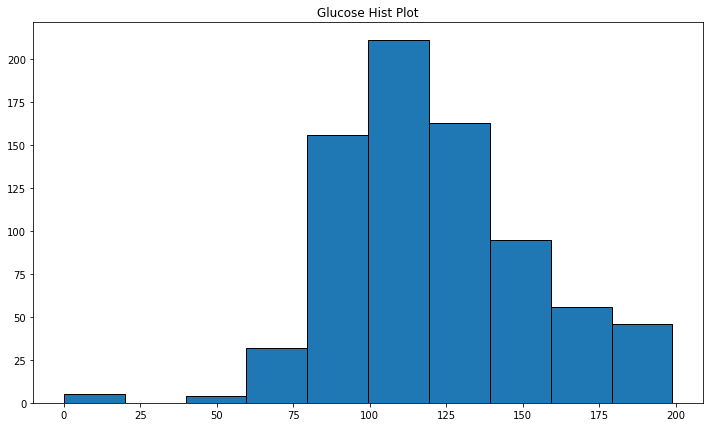

In [23]:
plt.figure(figsize=(12, 7))
plt.hist("Glucose", data = df, edgecolor = "k")
plt.title("Glucose Hist Plot")
plt.show()

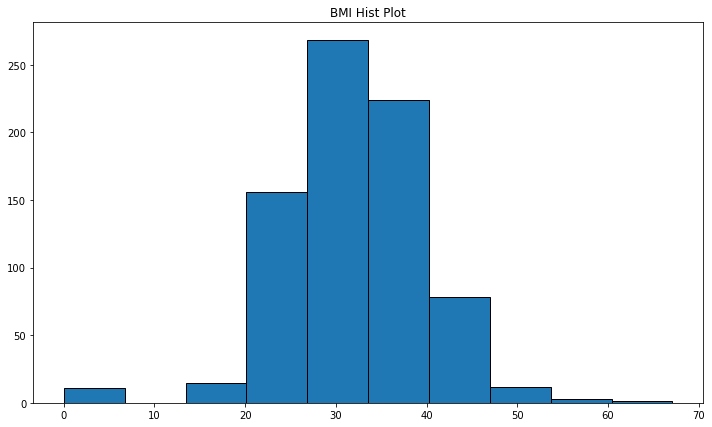

In [24]:
plt.figure(figsize = (12, 7))
plt.hist("BMI", data = df, edgecolor = "k")
plt.title("BMI Hist Plot")
plt.show()

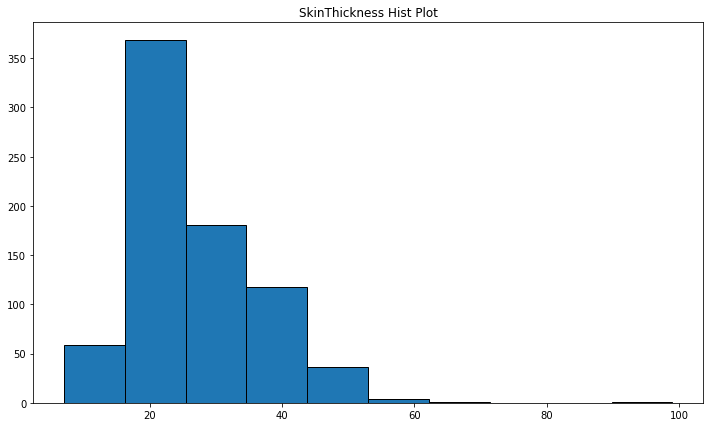

In [25]:
plt.figure(figsize = (12, 7))
plt.hist("SkinThickness", data = df, edgecolor = "k")
plt.title("SkinThickness Hist Plot")
plt.show()